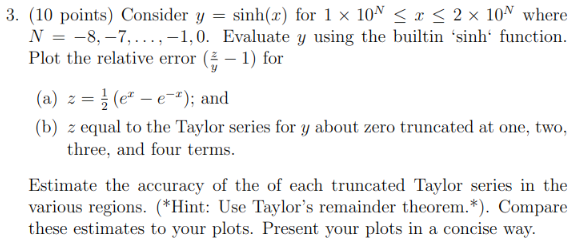
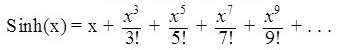

In [13]:
import numpy as np
import matplotlib.pyplot as plt

error = 1
c= 0
while True:
    error = error/2
    c+=1
    if 1+error == 1:
        break
        
eps = error*2

print(eps)

2.220446049250313e-16


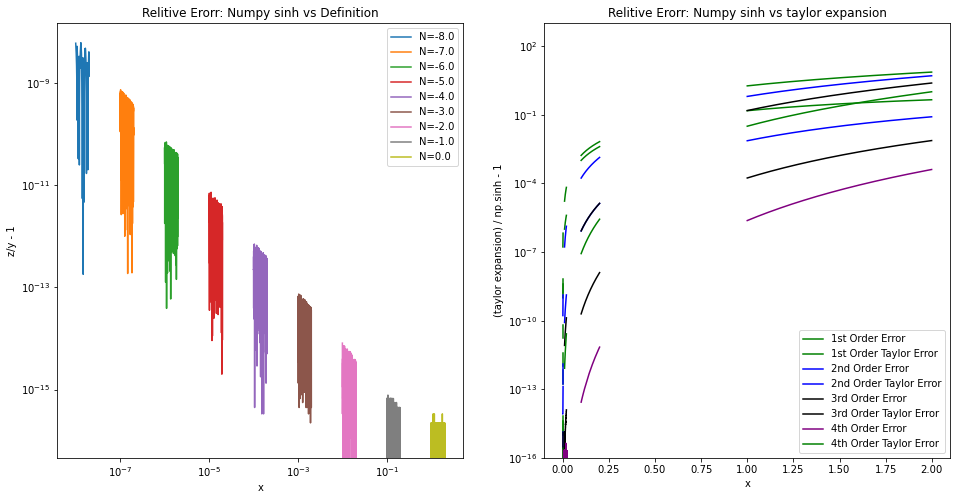

In [14]:
N = np.arange(-8,1,1,dtype=float)

def rel_err(y,z):
    return z/y - 1


def T_R(x, n, N):
    if n%2==0:
        f = abs(np.cosh(2*10**N)) #2 is biggest
    else:
        f= abs(np.sinh(2*10**N))
        
    R = f*abs(x-0)**(n+1)/np.math.factorial((n+1))
    return R

fig, axs = plt.subplots(ncols=2, figsize=(16, 8))

r_def_means = []
y_means = []


T_error_1 = []
T_error_2 = []
T_error_3 = []
T_error_4 = []

alph = 1
for n in N:
    
    x = np.arange(10**n,2*10**n,(10**n)*0.001,dtype=float)
    
    y_np = np.sinh(x)
    
    z_def = 0.5*(np.exp(x)-np.exp(-x))
    z_t1 = x
    z_t2 = x + x**3/6
    z_t3 = x + x**3/6 + x**5/(5*4*3*2)
    z_t4 = x + x**3/6 + x**5/(5*4*3*2) + x**7/(7*6*5*4*3*2)
    
    
    err_T_R_1 = T_R(x,1,n)
    err_T_R_2 = T_R(x,2,n)
    err_T_R_3 = T_R(x,3,n)
    err_T_R_4 = T_R(x,4,n)
    
    T_error_1.append(err_T_R_1)
    T_error_2.append(err_T_R_2)
    T_error_3.append(err_T_R_3)
    T_error_4.append(err_T_R_4)
    
    r_def = rel_err(y_np,z_def)
    r_t1 = rel_err(y_np,z_t1)
    r_t2 = rel_err(y_np,z_t2)
    r_t3 = rel_err(y_np,z_t3)
    r_t4 = rel_err(y_np,z_t4)
    
    
    #r_def_means.append(np.mean(np.absolute(r_def)/max(r_def)))
    #y_means.append(np.mean(np.absolute(y_np))/max(y_np))

    axs[0].loglog(x, abs(r_def), label=f"N={n}")
    axs[0].set_title('Relitive Erorr: Numpy sinh vs Definition')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('z/y - 1')
    axs[0].legend(loc='best')
    
    if n==-8:
        axs[1].plot(x, abs(r_t1), 'g', label='1st Order Error',alpha=1)
        axs[1].plot(x, abs(err_T_R_1),'g', label='1st Order Taylor Error',alpha=1)

        axs[1].plot(x, abs(r_t2),'b', label='2nd Order Error',alpha=1)
        axs[1].plot(x, abs(err_T_R_2),'b', label='2nd Order Taylor Error',alpha=1)

        axs[1].plot(x, abs(r_t3),'black',label='3rd Order Error',alpha=1)
        axs[1].plot(x, abs(err_T_R_3),'black', label='3rd Order Taylor Error',alpha=1)

        axs[1].plot(x, abs(r_t4),'purple',label='4th Order Error',alpha=1)
        axs[1].plot(x, abs(err_T_R_4),'green', label='4th Order Taylor Error',alpha=1)
        
    else:
        axs[1].plot(x, abs(r_t1), 'g',alpha=1)
        axs[1].plot(x, abs(err_T_R_1),'g',alpha=1)

        axs[1].plot(x, abs(r_t2),'b',alpha=1)
        axs[1].plot(x, abs(err_T_R_2),'b',alpha=1)

        axs[1].plot(x, abs(r_t3),'black',alpha=1)
        axs[1].plot(x, abs(err_T_R_3),'black',alpha=1)

        axs[1].plot(x, abs(r_t4),'purple',alpha=1)
        axs[1].plot(x, abs(err_T_R_4),'green',alpha=1)

    #axs[1].set_xscale('log')
    alph-=0.1


axs[1].set_title('Relitive Erorr: Numpy sinh vs taylor expansion')
axs[1].set_xlabel('x')
axs[1].set_ylabel('(taylor expansion) / np.sinh - 1')
axs[1].set_yscale('log')
axs[1].set_ylim(10**(-16), 10**3)

axs[1].legend(loc='best')
    

Left Plot: Each blotch represents a bunch of fluctations for each region of x. For N=0 it is nearly at the magnitude of the floating point error so the definition and numpy agree a lot. For more negative N it gets worse and the floating point error begins to encroach between numpy and the defintion.

Right Plot: The error between using the Taylors expansion and np.sinh quickly goes to 10^-16, which is the same order of magnitude of the floating point precision, for small values of x < 0.1. This makes sense because I took the taylor expansion about x = 0. The higher order terms ar more accurate at higher x and go in order based on the order of the taylor expansion. 

The taylor expansion remainder, converges similarly but can be up to a few orders of magnitude off. I don't know if that is because of the M factor I used for it or another effect, maybe I am not thinking about it right. To be more specific, the taylor remainder says I have a much larger error than the z/y-1 error by up to a few orders of magnitude. 

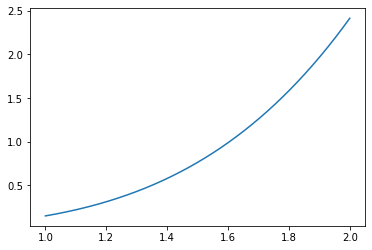

In [15]:
#gut test for the error
x2=np.arange(10**0,2*10**0,(10**0)*0.001,dtype=float)
plt.plot(x2, T_error_3[-1])
plt.show()

#yup as x increases the error increases
#at 1 it will still have large error because the taylor expansion is about 0
#and error drops as you go get higher orders of the expansion, sweeet.